# Clustering of Wholesale Customers

## Introduction / Overview


## The dataset

- #### What is the purpose of this dataset?

The purpose of this dataset is to get an overview over the annual spending on diverse product categories.

- #### What are the features? 

- Feature 1 =	CHANNEL: Customer Channel - Horeca (Hotel/Restaurant/Cafe's) or Retail channel (Nominal)
- Feature 2 =	FRESH: annual spending (m.u.) on fresh products (Continuous);
- Feature 3 =	MILK: annual spending (m.u.) on milk products (Continuous);
- Feature 4 =	GROCERY: annual spending (m.u.)on grocery products (Continuous);
- Feature 5 =	FROZEN: annual spending (m.u.)on frozen products (Continuous)
- Feature 6 =	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- Feature 7 =	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

There are no missing values in this dataset.

  
- #### What are the targets? 

The target is the Region, which is customer region, either Lisbon, Porto or Other(Nominal)


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [173]:
wholesale_customer_data_csv = pd.read_csv('Wholesale_customers_data.csv',sep=',')
wholesale_customer_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [174]:
target = wholesale_customer_data_csv['Region']
dataset = wholesale_customer_data_csv.drop(columns='Region')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


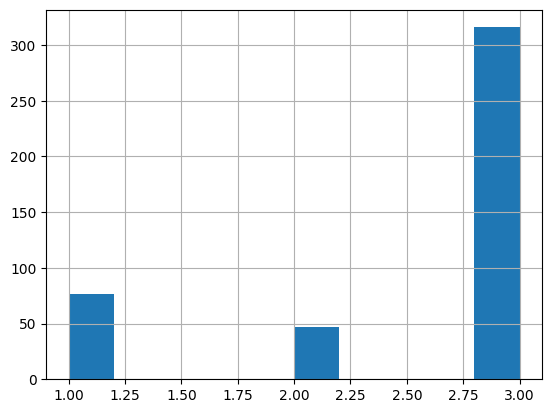

In [175]:
target.hist();

We can observe that target data is mostly distributed in the 3 which is Other(Nominal)

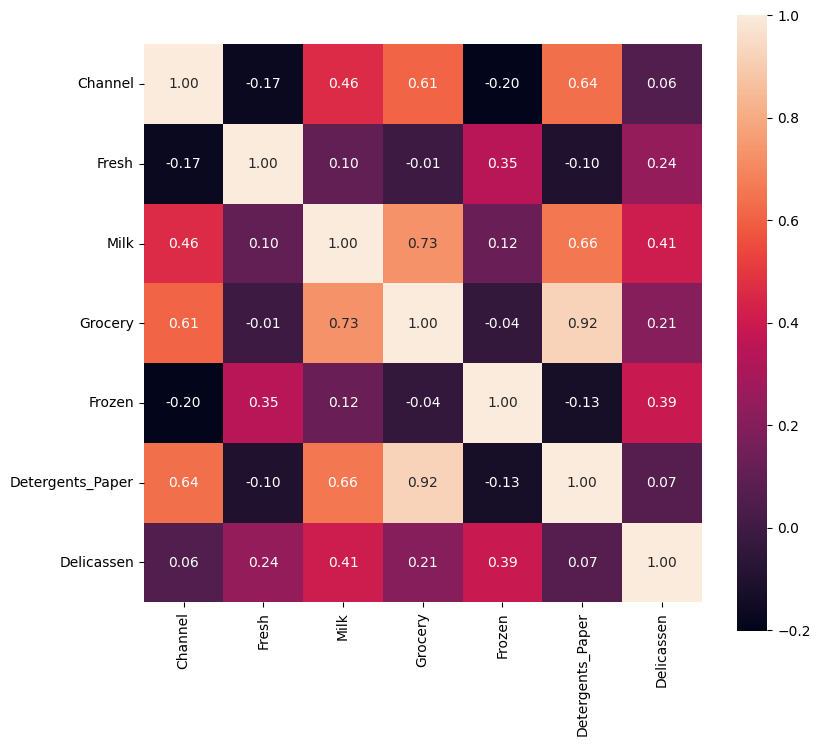

In [176]:
corrmat = dataset.corr()
fig, ax = plt.subplots(figsize=(9,8))
sb.heatmap(corrmat,ax=ax, square=True,annot=True, fmt='.2f');


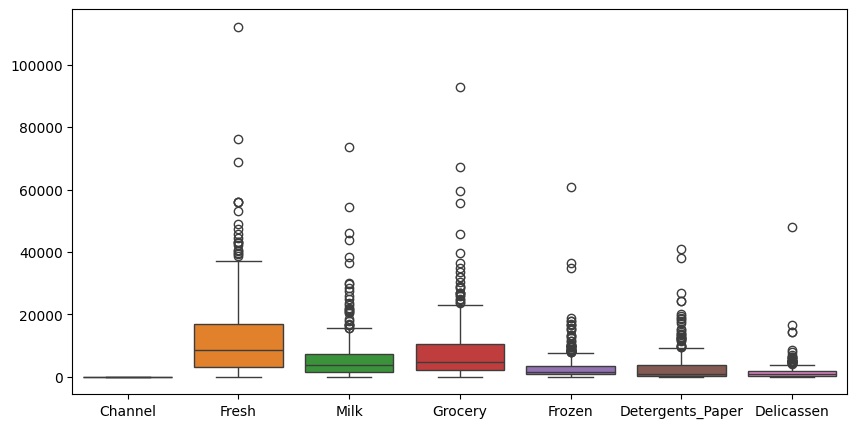

In [177]:
plt.figure(figsize=(10, 5))
fig = sb.boxplot(data=dataset)

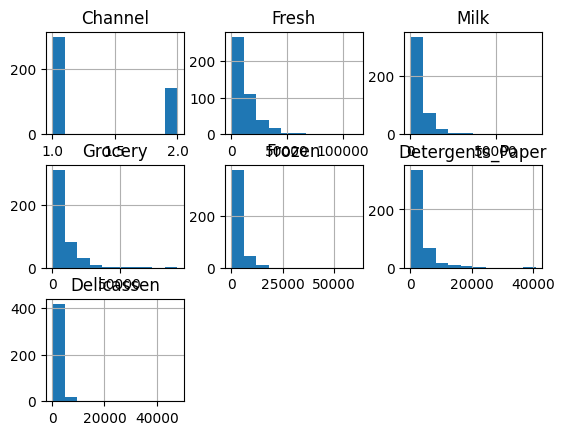

In [178]:
dataset.hist();

### Histogram observation

We see there is a big gap in the size of value in the x axis. So we will need to standardize it to center the data more.

In [179]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset))

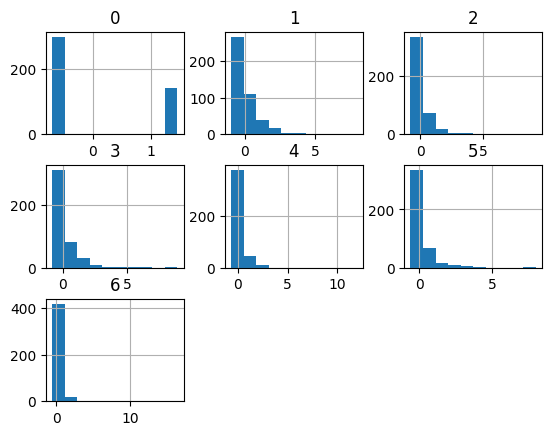

In [180]:
dataset_scaled.hist();

## Creating Elbow method

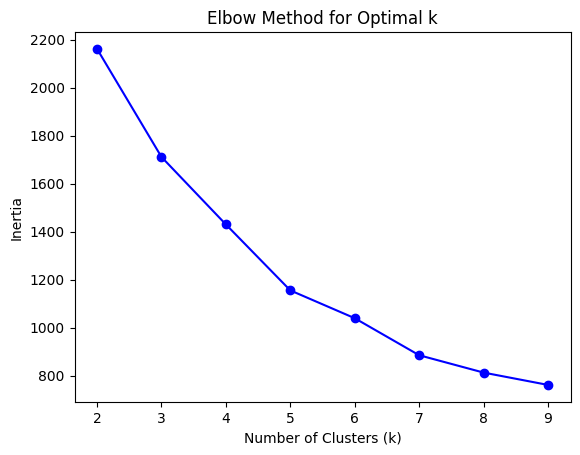

In [181]:
k_values = range(2, 10)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Struggling to get a clear elbow, but a place between k=3 and k=4

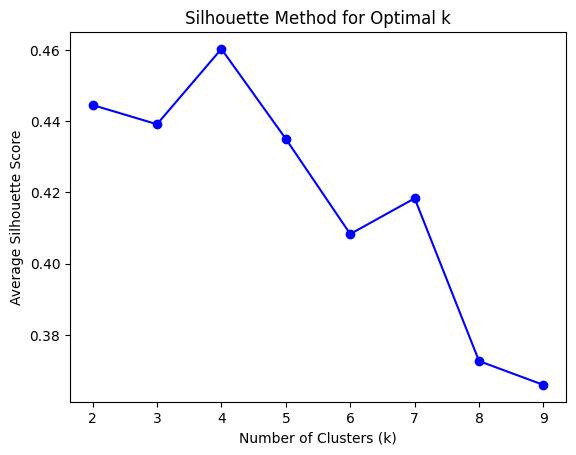

In [182]:
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset_scaled)
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


Highest peak at k=4, so we will use 4 clusters when using KMeans

# Creating the clustering algorithm

## KMeans clustering

In [183]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dataset_scaled)

labels = kmeans.labels_

In [184]:
ari = adjusted_rand_score(target, labels)
homogeneity = homogeneity_score(target, labels)
completeness = completeness_score(target, labels)
v_measure = v_measure_score(target, labels)
sil_score = silhouette_score(dataset_scaled, labels)
dbi = davies_bouldin_score(dataset_scaled, labels)

print('--------Internal--------')
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {dbi}')
print('--------External--------')
print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')


--------Internal--------
Silhouette Score: 0.46030499825903043
Davies-Bouldin Index: 1.1086949287450174
--------External--------
Adjusted Rand Index: -0.01302626695693025
Homogeneity: 0.007548232402224752
Completeness: 0.006615876309574941
V-Measure: 0.007051368066307299


### Adding more hyperparameters to scout for differences.

In [185]:
kmeans2 = KMeans(n_clusters=4, random_state=42,init='k-means++',n_init=10, max_iter=300)
kmeans2.fit(dataset_scaled)

labels2 = kmeans2.labels_

In [186]:
ari = adjusted_rand_score(target, labels2)
homogeneity = homogeneity_score(target, labels2)
completeness = completeness_score(target, labels2)
v_measure = v_measure_score(target, labels2)
sil_score = silhouette_score(dataset_scaled, labels2)
dbi = davies_bouldin_score(dataset_scaled, labels2)

print('--------Internal--------')
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {dbi}')
print('--------External--------')
print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

--------Internal--------
Silhouette Score: 0.4424996600053589
Davies-Bouldin Index: 0.7743443742088536
--------External--------
Adjusted Rand Index: -0.01584616044392651
Homogeneity: 0.007292208403460724
Completeness: 0.007727935848090735
V-Measure: 0.0075037519998560264


## Discussing the results of the KMeans clustering


### The results
The first model without hypertuning is slightly better. The hyperparameters on the 2nd model might be redundant or not well tuned. 

#### The internal

Model 2 is better because its clusters are more compact and well-separated, as shown by the lower Davies-Bouldin score. The difference in silhouette score is so small it doesn't make much of a difference.

#### The external

The difference in values are so marginally small that we can conclude that its insignificant.

They are all pretty low which indicates that they are all bad. 

ARI is negative, which indicates that there is bad alignment with any ground truth.

### Worth noting

There is a lack of pre processing done on the dataset to try out different solutions to produce better results.


## DBscan clustering

In [187]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels1 = dbscan.fit_predict(dataset_scaled)

dataset['Cluster'] = predicted_labels1

dataset['Cluster'].value_counts()

Cluster
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64

In [188]:
ari = adjusted_rand_score(target, predicted_labels1)
homogeneity = homogeneity_score(target, predicted_labels1)
completeness = completeness_score(target, predicted_labels1)
v_measure = v_measure_score(target, predicted_labels1)
sil_score = silhouette_score(dataset_scaled[predicted_labels1 != -1], predicted_labels1[predicted_labels1 != -1])
dbi = davies_bouldin_score(dataset_scaled, predicted_labels1)

print('--------Internal--------')
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {dbi}')
print('--------External--------')
print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

--------Internal--------
Silhouette Score: 0.4978742250035533
Davies-Bouldin Index: 1.7444505952841909
--------External--------
Adjusted Rand Index: -0.015591678977594177
Homogeneity: 0.01414234364976026
Completeness: 0.010698113062642942
V-Measure: 0.012181450050420465


In [290]:
dbscan2 = DBSCAN(eps=0.54, min_samples=5)
predicted_labels2 = dbscan2.fit_predict(dataset_scaled)

dataset['Cluster'] = predicted_labels2

dataset['Cluster'].value_counts()

Cluster
 1    213
-1    173
 0     49
 2      5
Name: count, dtype: int64

In [291]:
ari = adjusted_rand_score(target, predicted_labels2)
homogeneity = homogeneity_score(target, predicted_labels2)
completeness = completeness_score(target, predicted_labels2)
v_measure = v_measure_score(target, predicted_labels2)
sil_score = silhouette_score(dataset_scaled[predicted_labels2 != -1], predicted_labels2[predicted_labels2 != -1])
dbi = davies_bouldin_score(dataset_scaled, predicted_labels2)

print('--------Internal--------')
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {dbi}')
print('--------External--------')
print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

--------Internal--------
Silhouette Score: 0.5422216966853809
Davies-Bouldin Index: 1.7530028843465648
--------External--------
Adjusted Rand Index: -0.02103289824810022
Homogeneity: 0.01157349123672025
Completeness: 0.00892579236779171
V-Measure: 0.01007865267317777


## Discussing the results of the DBScan clustering


### The results
Overall the results are not impressive. To be optimistic, some could call them mediocre, by looking at the internal results. 

#### The internal
The 'best' internal results from my model. 

Silhouette Score: 0.5422216966853809
Davies-Bouldin Index: 1.7530028843465648

but can be misleading due to the amount of noise in the model.

#### The external

The difference in values are so marginally small that we can conclude that its insignificant.

They are all pretty low which indicates that they are all bad. 

### Worth noting

There is a lack of pre processing done on the dataset to try out different solutions to produce better results.

# Conclusion

The DBScan has the better scores, however I am not convinced that its the better clustering algorithm because of the lack of testing, tuning and exploring of the dataset. 

## Reflections

Due to time constraints, underestimating the depth of the assignment, lack of explantions for the decisions made, and understanding of the entire process. I apologize for submitting an incomplete assignment. I recognize that this is not my best work, and looking forward to fixing the mistakes later on.   



### Possible improvements
- Include more plots/graphs/visuals along explanations
- More explanations with the results, and what they mean for the model performance. 
- Add more insight in noise with the DBScan